**Importing Required Libraries**

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

**Loading the Datase**

In [16]:
missingValues = ['','nan',"NAN"]
Students = pd.read_csv('Student_Performance.csv' ,na_values = missingValues)


**Checking for Missing Values**

In [17]:
Students.isna().sum()
# Checked for missing values → none found so no imputation required

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


**Encode Categorical Features**

In [18]:
encoder = LabelEncoder()
Students['Extracurricular Activities'] = encoder.fit_transform(Students['Extracurricular Activities'])

**Standardize Numerical Features**

In [19]:
scaler = StandardScaler()
num_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
Students[num_features] = scaler.fit_transform(Students[num_features])

**Perform Exploratory Data Analysis (EDA):**

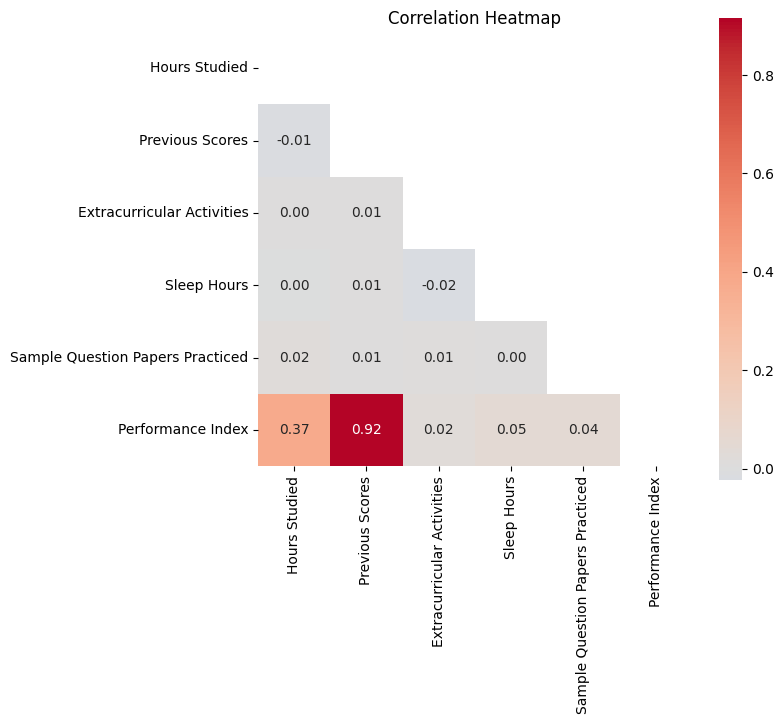

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load fresh data for clarity
eda_df = pd.read_csv('Student_Performance.csv')
eda_df['Extracurricular Activities'] = (eda_df['Extracurricular Activities']=='Yes').astype(int)

# Correlation matrix
corr = eda_df.corr(numeric_only=True)

# Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(7,6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')
plt.show()


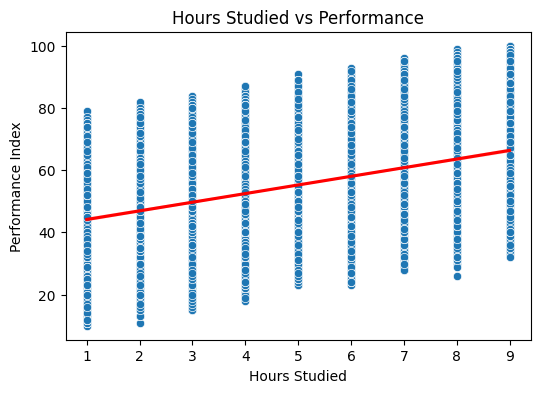

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Hours Studied', y='Performance Index', data=eda_df)
sns.regplot(x='Hours Studied', y='Performance Index', data=eda_df, scatter=False, color='red')
plt.title('Hours Studied vs Performance')
plt.show()


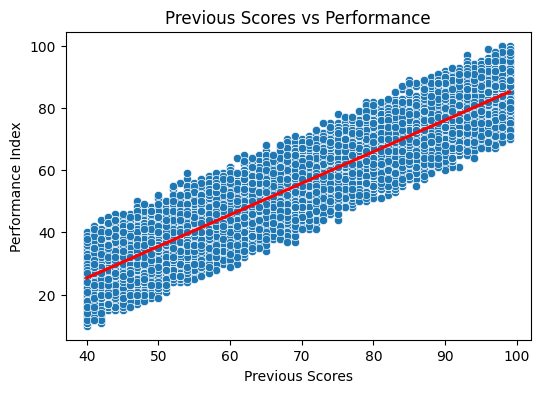

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Previous Scores', y='Performance Index', data=eda_df)
sns.regplot(x='Previous Scores', y='Performance Index', data=eda_df, scatter=False, color='red')
plt.title('Previous Scores vs Performance')
plt.show()


/tmp/ipython-input-1023064539.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Extracurricular Activities', y='Performance Index', data=eda_df, ci=None)


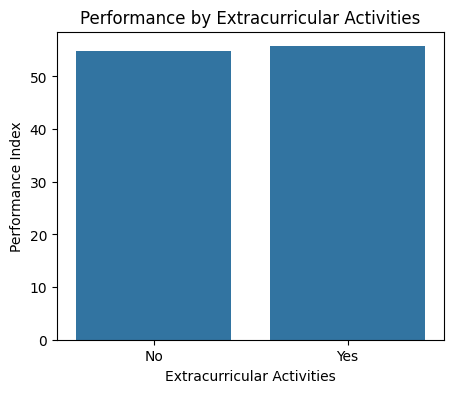

In [23]:
plt.figure(figsize=(5,4))
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=eda_df, ci=None)
plt.title('Performance by Extracurricular Activities')
plt.xticks([0,1], ['No','Yes'])
plt.show()


**Feature Importance from Ridge Coefficients**

*   This shows how much each feature contributes to the prediction




In [33]:
coef = pd.Series(ridge.coef_, index=X_train.columns).sort_values(key=abs, ascending=False)
print("Ridge coefficients :\n", coef)
# Expect: Previous Scores >> Hours Studied >> (small) Sleep/Extracurricular/Papers

Ridge coefficients :
 Previous Scores                     17.635057
Hours Studied                        7.400393
Sleep Hours                          0.809933
Extracurricular Activities           0.608327
Sample Question Papers Practiced     0.548810
dtype: float64


**Spliting the Data into Training and Testing Sets**

In [30]:
X = Students.drop('Performance Index', axis=1)
y = Students['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train/Test shapes:", X_train.shape, X_test.shape)
#80 % --> 8,000 went to training
#20 % --> 2,000 went to testing

Train/Test shapes: (8000, 5) (2000, 5)


**Standardize Numerical Features**

In [25]:

num_features = ['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']

scaler = StandardScaler()

X_train.loc[:, num_features] = scaler.fit_transform(X_train[num_features])
X_test.loc[:,  num_features] = scaler.transform(X_test[num_features])


**Training Ridge Regression Model and Generate Predictions and Evaluate Performance**




In [26]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.61122225609473
